<div style="text-align: center;">
 <span style="font-size: 30px; color: black;">Salinity Prediction Model for DOE, Bangladesh.</span>
</div>


<span style="font-size: 25px; color: red;"> Description:</span> <span style="font-size: 20px;color: black;">Water management requires a lot of laboratory work, and the conventional way of assessment is very time-consuming and cumbersome. Using predictive modeling can solve this problem. Using machine learning algorithms, I predicted the Salinity of the Karnaphuli river. Two prediction models was be created, one parameter-based and another one time-series-based.</span>


### Load All the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
#### My dataset had some unicode so I had to do Encoding before loading the dataframe
encodings_to_try = ["utf-8", "latin1", "ISO-8859-1"]

for encoding in encodings_to_try:
    try:
        df = pd.read_csv("DOE.csv", encoding=encoding)
        break
    except UnicodeDecodeError:
        pass

df.head()


,Year,Sample Location,Lab code,Date,Temp,PH,EC(µS/cm),TS(mg/l),TDS(mg/l),SS(mg/l),DO(mg/l),Salinity(%)
0,2017,"Karnafully River CUFL side Anowara, Ctg.",403,5/1/2017,22.2,8.1,20450,10414.0,10228.0,186,5.6,14.2
1,2017,"Karnafully River TSP Side, Patenga, Ctg.",404,5/1/2017,22.2,7.9,19984,10190.0,9992.0,198,6.1,13.8
2,2017,"Karnafully River CUFL side Anowara, Ctg.",437,5/2/2017,21.1,7.3,22580,11494.0,11292.0,202,4.8,14.8
3,2017,"Karnafully River TSP Side, Patenga, Ctg.",438,5/2/2017,21.1,7.9,21356,10906.0,10678.0,228,5.4,13.6
4,2017,"Karnafully River TSP Side, Patenga, Ctg.",471,7/3/2017,25.6,7.3,26330,13476.0,13168.0,308,6.1,17.2


### Data Exploration & Cleaning

In [3]:
# Get the column names
column_names = df.columns

# Create a dictionary to store the unique values and counts for each column
column_unique_values_counts = {}

# Loop through each column and calculate unique values and their counts
for column in column_names:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    column_unique_values_counts[column] = {
        'unique_values': unique_values,
        'count': unique_count
    }

# Print the column names, unique values, and counts
for column, values_counts in column_unique_values_counts.items():
    print(f"Column: {column}")
    print(f"Unique Values: {values_counts['unique_values']}")
    print(f"Unique Count: {values_counts['count']}\n")

Column: Year
Unique Values: [2017 2018 2019 2020 2021 2022]
Unique Count: 6

Column: Sample Location
Unique Values: ['Karnafully River CUFL side  Anowara, Ctg.'
 'Karnafully River TSP Side, Patenga, Ctg.'
 'Karnafully River CUFL side Anowara, Ctg.'
 'Karnafully River  CUFL side  Anowara, Ctg.'
 'Karnafully River  TSP Side, Patenga, Ctg.'
 'Karnafully River  Chaktai Khal, ctg.'
 'Karnafully River Chaktai Khal, ctg.'
 'Karnafully River CUFL side,  Anowara, Ctg.'
 'Karnafully River KAFCO Side, ctg.' 'Karnafully River KAFCO side.'
 '15 NO. Ghat.' '15 No Ghat' 'k.R.CUFL Side' 'K.R.TSP Side'
 'K.R Shikalbaha P.S.' 'K.R Kalurghat Bridge.' 'K.R Mariam Nagar.'
 'K.R karnaphuli Paper Mills.' 'CUFL Side' 'TSP Side' 'Shikalbaha P.S.'
 'Kalurghat Bridge.' 'Mariam Nagar.' 'karnaphuli Paper Mills.'
 'Shikalbaha' 'Kalurghat Bridge' 'Mariam Nagar' 'Karnaphuli paper'
 'Karnaphuli Paper']
Unique Count: 29

Column: Lab code
Unique Values: [ 403  404  437  438  471  472  505  506  539  540  573  574  607  

In [4]:
# Drop unimportant columns
df = df.drop(['Lab code','Temp'],axis='columns')
df.head()

,Year,Sample Location,Date,PH,EC(µS/cm),TS(mg/l),TDS(mg/l),SS(mg/l),DO(mg/l),Salinity(%)
0,2017,"Karnafully River CUFL side Anowara, Ctg.",5/1/2017,8.1,20450,10414.0,10228.0,186,5.6,14.2
1,2017,"Karnafully River TSP Side, Patenga, Ctg.",5/1/2017,7.9,19984,10190.0,9992.0,198,6.1,13.8
2,2017,"Karnafully River CUFL side Anowara, Ctg.",5/2/2017,7.3,22580,11494.0,11292.0,202,4.8,14.8
3,2017,"Karnafully River TSP Side, Patenga, Ctg.",5/2/2017,7.9,21356,10906.0,10678.0,228,5.4,13.6
4,2017,"Karnafully River TSP Side, Patenga, Ctg.",7/3/2017,7.3,26330,13476.0,13168.0,308,6.1,17.2


In [5]:
# Loop through each column and count null values
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"'{column}': {null_count} ")

'Year': 0 
'Sample Location': 0 
'Date': 138 
'PH': 0 
'EC(µS/cm)': 0 
'TS(mg/l)': 0 
'TDS(mg/l)': 0 
'SS(mg/l)': 0 
'DO(mg/l)': 6 
'Salinity(%)': 69 


In [6]:
#### The empty Date cells will be filled using the previous row
df['Date'].fillna(method='ffill', inplace=True)

df.head()

,Year,Sample Location,Date,PH,EC(µS/cm),TS(mg/l),TDS(mg/l),SS(mg/l),DO(mg/l),Salinity(%)
0,2017,"Karnafully River CUFL side Anowara, Ctg.",5/1/2017,8.1,20450,10414.0,10228.0,186,5.6,14.2
1,2017,"Karnafully River TSP Side, Patenga, Ctg.",5/1/2017,7.9,19984,10190.0,9992.0,198,6.1,13.8
2,2017,"Karnafully River CUFL side Anowara, Ctg.",5/2/2017,7.3,22580,11494.0,11292.0,202,4.8,14.8
3,2017,"Karnafully River TSP Side, Patenga, Ctg.",5/2/2017,7.9,21356,10906.0,10678.0,228,5.4,13.6
4,2017,"Karnafully River TSP Side, Patenga, Ctg.",7/3/2017,7.3,26330,13476.0,13168.0,308,6.1,17.2


In [7]:
df['Date'].isnull().sum()

0

In [ ]:
# Check if the empty cells were filled properly
df.iloc[208:213]

In [8]:
# Split the date column into day, month, and year columns
df[['day', 'month', 'year']] = df['Date'].str.split('/', expand=True).astype(int)

# Now, my DataFrame have three new columns 'day', 'month', and 'year' containing the respective date components
df.head()

,Year,Sample Location,Date,PH,EC(µS/cm),TS(mg/l),TDS(mg/l),SS(mg/l),DO(mg/l),Salinity(%),day,month,year
0,2017,"Karnafully River CUFL side Anowara, Ctg.",5/1/2017,8.1,20450,10414.0,10228.0,186,5.6,14.2,5,1,2017
1,2017,"Karnafully River TSP Side, Patenga, Ctg.",5/1/2017,7.9,19984,10190.0,9992.0,198,6.1,13.8,5,1,2017
2,2017,"Karnafully River CUFL side Anowara, Ctg.",5/2/2017,7.3,22580,11494.0,11292.0,202,4.8,14.8,5,2,2017
3,2017,"Karnafully River TSP Side, Patenga, Ctg.",5/2/2017,7.9,21356,10906.0,10678.0,228,5.4,13.6,5,2,2017
4,2017,"Karnafully River TSP Side, Patenga, Ctg.",7/3/2017,7.3,26330,13476.0,13168.0,308,6.1,17.2,7,3,2017


In [9]:
unique_sample_locations = df['Sample Location'].unique()
print(unique_sample_locations)


['Karnafully River CUFL side  Anowara, Ctg.'
 'Karnafully River TSP Side, Patenga, Ctg.'
 'Karnafully River CUFL side Anowara, Ctg.'
 'Karnafully River  CUFL side  Anowara, Ctg.'
 'Karnafully River  TSP Side, Patenga, Ctg.'
 'Karnafully River  Chaktai Khal, ctg.'
 'Karnafully River Chaktai Khal, ctg.'
 'Karnafully River CUFL side,  Anowara, Ctg.'
 'Karnafully River KAFCO Side, ctg.' 'Karnafully River KAFCO side.'
 '15 NO. Ghat.' '15 No Ghat' 'k.R.CUFL Side' 'K.R.TSP Side'
 'K.R Shikalbaha P.S.' 'K.R Kalurghat Bridge.' 'K.R Mariam Nagar.'
 'K.R karnaphuli Paper Mills.' 'CUFL Side' 'TSP Side' 'Shikalbaha P.S.'
 'Kalurghat Bridge.' 'Mariam Nagar.' 'karnaphuli Paper Mills.'
 'Shikalbaha' 'Kalurghat Bridge' 'Mariam Nagar' 'Karnaphuli paper'
 'Karnaphuli Paper']


#### Here the name of sample locations are too messy. So I'll rename them to a easier one 

In [10]:
len(unique_sample_locations)

29

In [ ]:
mapping = {
    'Karnafully River CUFL side Anowara, Ctg.': 'CUFL',
    'Karnafully River  CUFL side  Anowara, Ctg.': 'CUFL',
    'Karnafully River  TSP Side, Patenga, Ctg.': 'TSP',
    'Karnafully River  Chaktai Khal, ctg.': 'Chaktai Khal',
    'Karnafully River Chaktai Khal, ctg.': 'Chaktai Khal',
    'Karnafully River CUFL side,  Anowara, Ctg.': 'CUFL',
    'Karnafully River KAFCO Side, ctg.': 'KAFCO',
    'Karnafully River KAFCO side.': 'KAFCO',
    '15 NO. Ghat.': 'Ghat15',
    '15 No Ghat': 'Ghat15',
    'k.R.CUFL Side': 'CUFL',
    'K.R.TSP Side': 'TSP',
    'K.R Shikalbaha P.S.': 'Shikalbaha',
    'K.R Kalurghat Bridge.': 'Kalurghat',
    'K.R Mariam Nagar.': 'Mariam Nagar',
    'K.R karnaphuli Paper Mills.': 'KP Mills',
    'CUFL Side': 'CUFL',
    'TSP Side': 'TSP',
    'Shikalbaha P.S.': 'Shikalbaha',
    'Kalurghat Bridge.': 'Kalurghat',
    'Mariam Nagar.': 'Mariam Nagar',
    'karnaphuli Paper Mills.': 'KP Mills',
    'Shikalbaha': 'Shikalbaha',
    'Kalurghat Bridge': 'Kalurghat',
    'Mariam Nagar': 'Mariam Nagar',
    'Karnaphuli paper': 'KP Mills',
    'Karnaphuli Paper': 'KP Mills'
}

df['Sample Location'] = df['Sample Location'].replace(mapping)

df.head()

In [11]:
df['Sample Location'].unique()

array(['Karnafully River CUFL side  Anowara, Ctg.',
       'Karnafully River TSP Side, Patenga, Ctg.',
       'Karnafully River CUFL side Anowara, Ctg.',
       'Karnafully River  CUFL side  Anowara, Ctg.',
       'Karnafully River  TSP Side, Patenga, Ctg.',
       'Karnafully River  Chaktai Khal, ctg.',
       'Karnafully River Chaktai Khal, ctg.',
       'Karnafully River CUFL side,  Anowara, Ctg.',
       'Karnafully River KAFCO Side, ctg.',
       'Karnafully River KAFCO side.', '15 NO. Ghat.', '15 No Ghat',
       'k.R.CUFL Side', 'K.R.TSP Side', 'K.R Shikalbaha P.S.',
       'K.R Kalurghat Bridge.', 'K.R Mariam Nagar.',
       'K.R karnaphuli Paper Mills.', 'CUFL Side', 'TSP Side',
       'Shikalbaha P.S.', 'Kalurghat Bridge.', 'Mariam Nagar.',
       'karnaphuli Paper Mills.', 'Shikalbaha', 'Kalurghat Bridge',
       'Mariam Nagar', 'Karnaphuli paper', 'Karnaphuli Paper'],
      dtype=object)

#### The data frame is pretty clean now and can be used for the further processing.

### For convenience save the Cleaned up data frame as a new csv file. Here I saved it as DOE_2 and loaded the new file.

In [12]:
df = pd.read_csv("DOE_2.csv")
df.head()

,Year,Sample Location,Temp,PH,EC(µS/cm),TS(mg/l),TDS(mg/l),SS(mg/l),DO(mg/l),Salinity(%),month
0,2017,CUFL,22.2,8.1,20450.0,10414.0,10228.0,186.0,5.6,14.2,1
1,2017,TSP,22.2,7.9,19984.0,10190.0,9992.0,198.0,6.1,13.8,1
2,2017,CUFL,21.1,7.3,22580.0,11494.0,11292.0,202.0,4.8,14.8,2
3,2017,TSP,21.1,7.9,21356.0,10906.0,10678.0,228.0,5.4,13.6,2
4,2017,TSP,25.6,7.3,26330.0,13476.0,13168.0,308.0,6.1,17.2,3


In [13]:
len(df)

171

In [14]:
df.shape

(171, 11)

### Data Visualization

#### This has to be done as per your objective. Here I want to see how salinity is changing over the months 

In [15]:
def create_line_plots(df, column_name, years):
    # Calculate the number of rows and columns for subplots
    num_years = len(years)
    num_cols = 2
    num_rows = 3

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

    # Flatten the axes array to simplify indexing
    axes = axes.flatten()

    # Iterate through the years
    for i, year in enumerate(years):
        # Filter the DataFrame for the current year
        year_data = df[df['Year'] == year]

        # Create a line plot using Seaborn
        sns.lineplot(data=year_data, x='month', y=column_name, marker='o', color='b', ax=axes[i])
        axes[i].set_title(f'{column_name} in Year {year}')
        axes[i].set_xlabel('Month')
        axes[i].set_ylabel(column_name)
        axes[i].grid(True)

    # Hide any remaining empty subplots
    for i in range(num_years, num_rows * num_cols):
        fig.delaxes(axes[i])

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

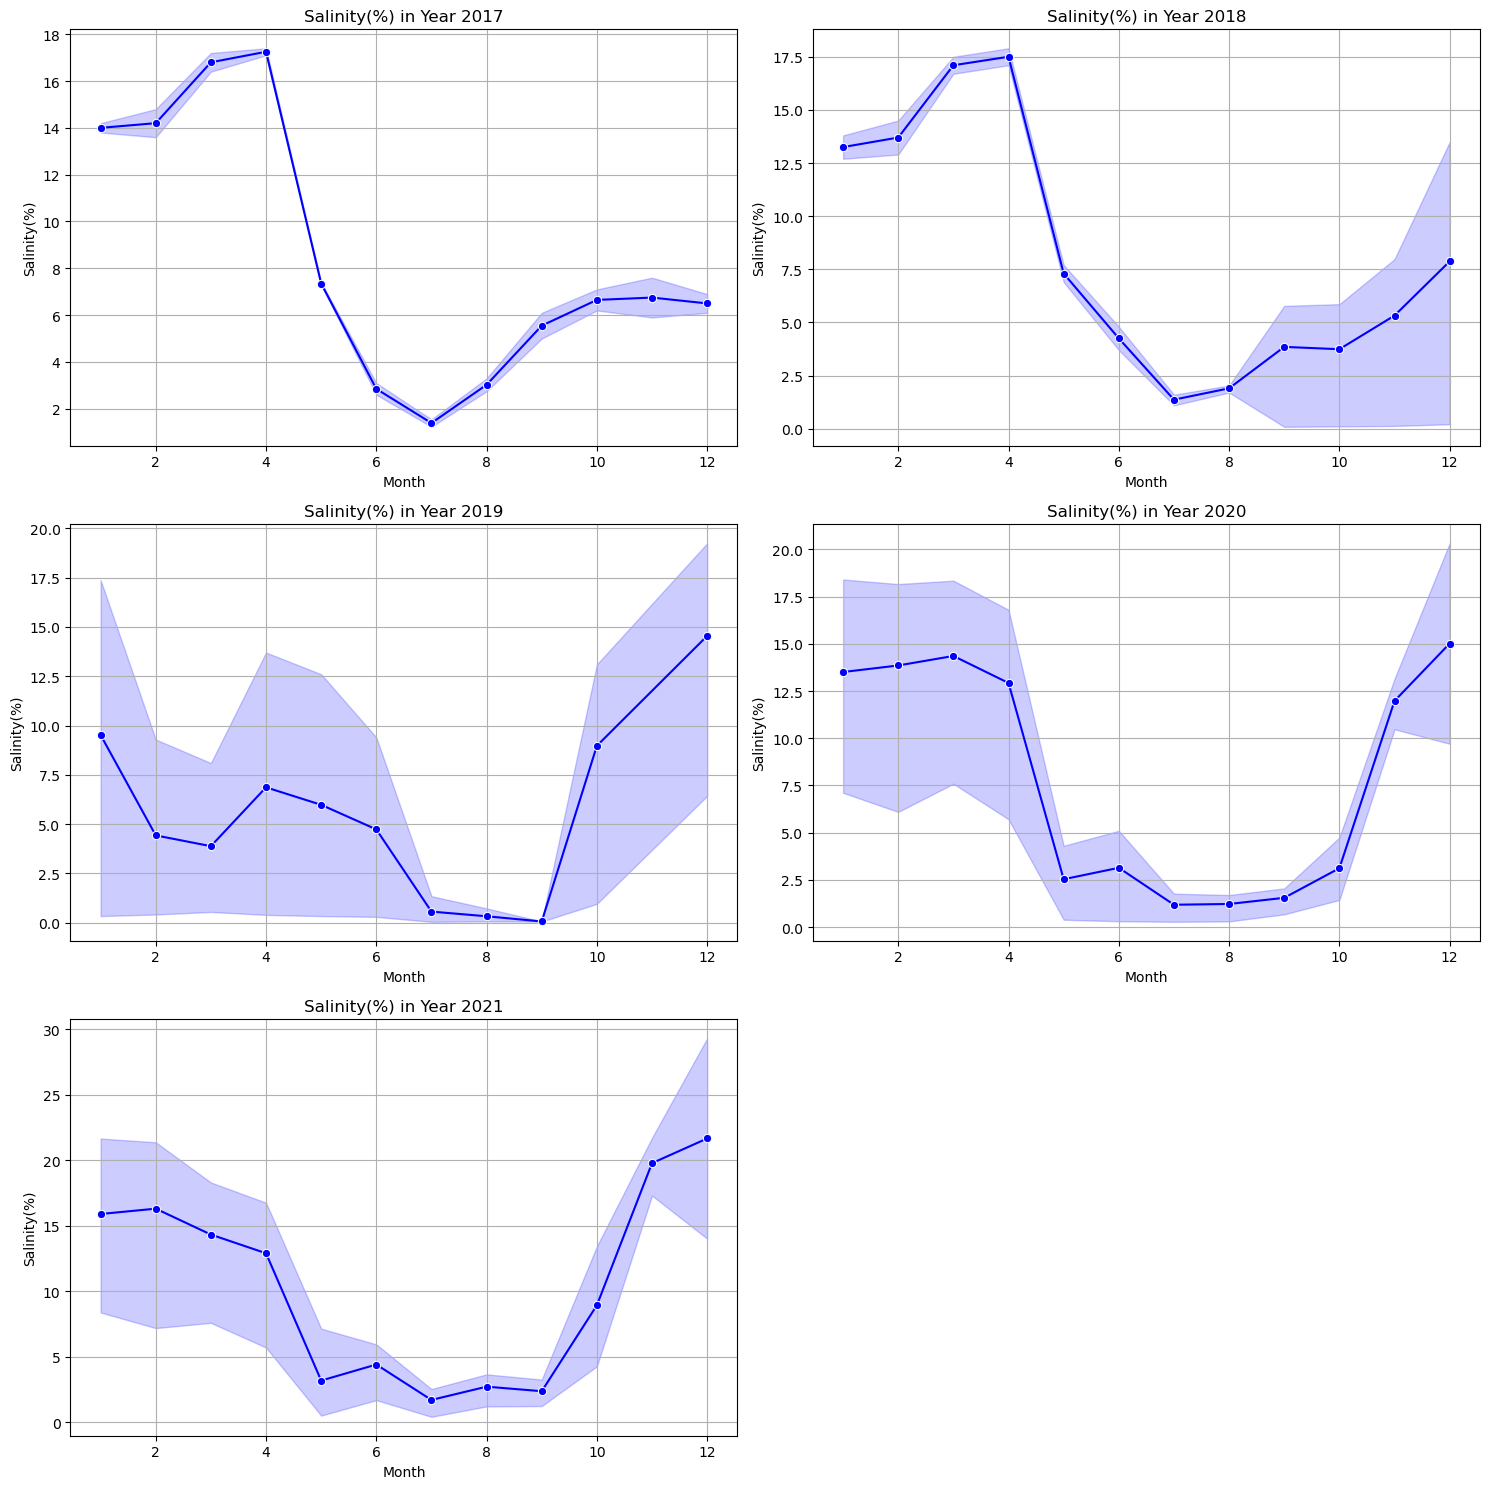

In [16]:

create_line_plots(df, 'Salinity(%)', [2017, 2018, 2019, 2020, 2021])

In [ ]:
create_line_plots(df, 'DO(mg/l)', [2017, 2018, 2019, 2020, 2021])

### Scaling

#### Scaling is very important for accurate visualization and prediction.In order to draw multiple columns in the same plot we need to scale the values.

In [17]:
### Here the range of the Columns are very high so I will scale it for better visualization
from sklearn.preprocessing import MinMaxScaler


# Define the columns to scale
columns_to_scale = ['PH', 'EC(µS/cm)', 'TS(mg/l)', 'TDS(mg/l)', 'SS(mg/l)', 'DO(mg/l)', 'Salinity(%)']

# Make a copy of the original DataFrame
df_scaled = df.copy()

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the specified columns in the copied DataFrame
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

# Now, the specified columns are scaled between 0 and 1 in df_scaled
# You still have the original unscaled data in the df DataFrame

In [18]:
df_scaled.head()

,Year,Sample Location,Temp,PH,EC(µS/cm),TS(mg/l),TDS(mg/l),SS(mg/l),DO(mg/l),Salinity(%),month
0,2017,CUFL,22.2,0.708333,0.492862,0.458941,0.459217,0.073260,0.546485,0.483100,1
1,2017,TSP,22.2,0.625000,0.481577,0.448940,0.448571,0.080586,0.603175,0.469443,1
2,2017,CUFL,21.1,0.375000,0.544443,0.507162,0.507216,0.083028,0.455782,0.503585,2
3,2017,TSP,21.1,0.625000,0.514802,0.480908,0.479517,0.098901,0.523810,0.462615,2
4,2017,TSP,25.6,0.375000,0.635255,0.595655,0.591844,0.147741,0.603175,0.585524,3


#### Multiple Plots

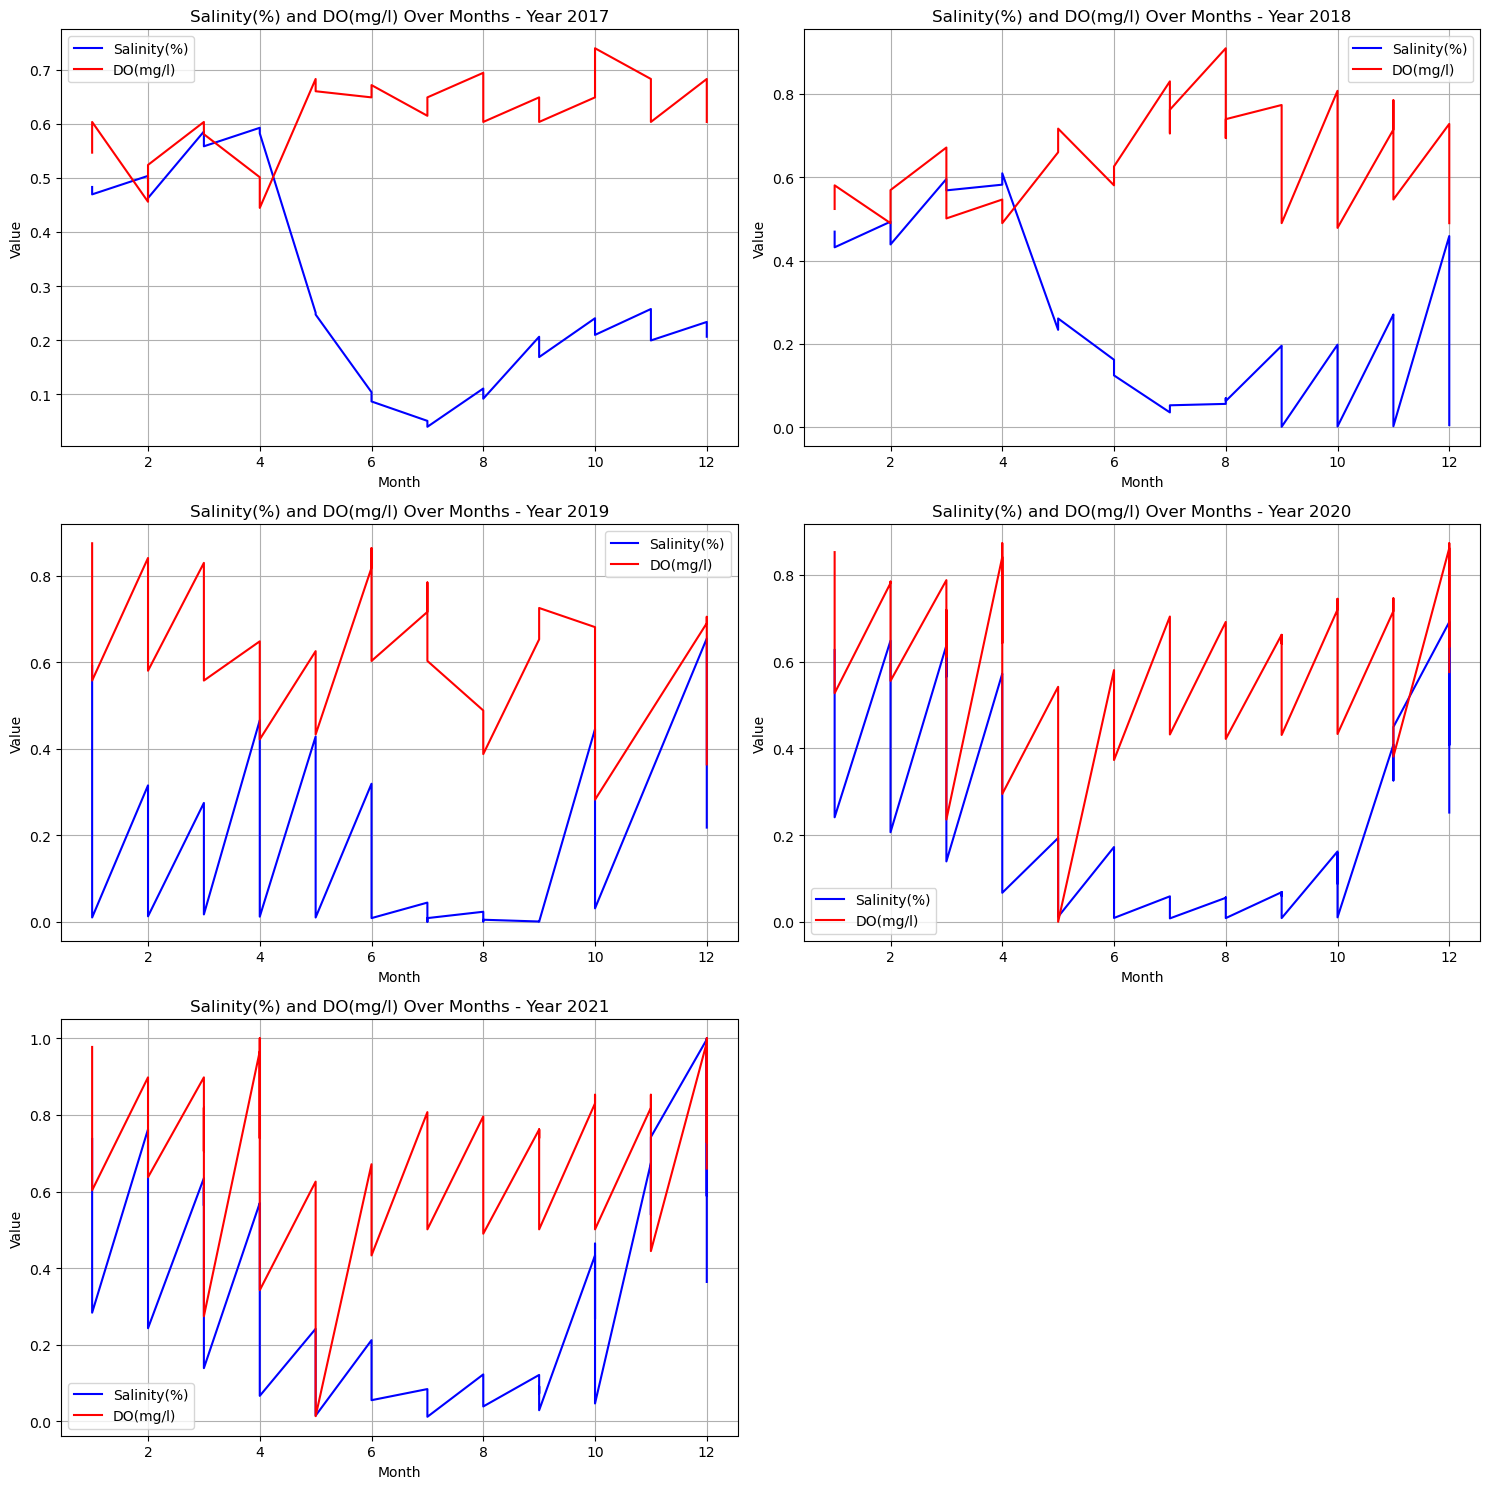

In [20]:
def create_multiline_plots(df_scaled, num_rows=3, num_cols=2, x_col='month', y1_col=None, y2_col=None):
    # Create subplots for each year's data
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Iterate through years 2017 to 2021
    for i, year in enumerate(range(2017, 2022)):
        # Filter the data for the current year
        year_data = df_scaled[df_scaled['Year'] == year]

        # Select the columns for the plot
        months = year_data[x_col]
        y1 = year_data[y1_col]
        y2 = year_data[y2_col]

        # Plot on the current subplot
        ax = axes[i]
        ax.plot(months, y1, label=y1_col, color='blue')
        ax.plot(months, y2, label=y2_col, color='red')

        # Customize the subplot
        ax.set_xlabel('Month')
        ax.set_ylabel('Value')
        ax.set_title(f'{y1_col} and {y2_col} Over Months - Year {year}')
        ax.legend()
        ax.grid(True)

    # Remove empty subplots if there are any
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes[j])

    # Adjust layout for subplots
    plt.tight_layout()

    # Show the subplots
    plt.show()

# Example usage:
create_multiline_plots(df_scaled, num_rows=3, num_cols=2, x_col='month', y1_col='Salinity(%)', y2_col='DO(mg/l)')


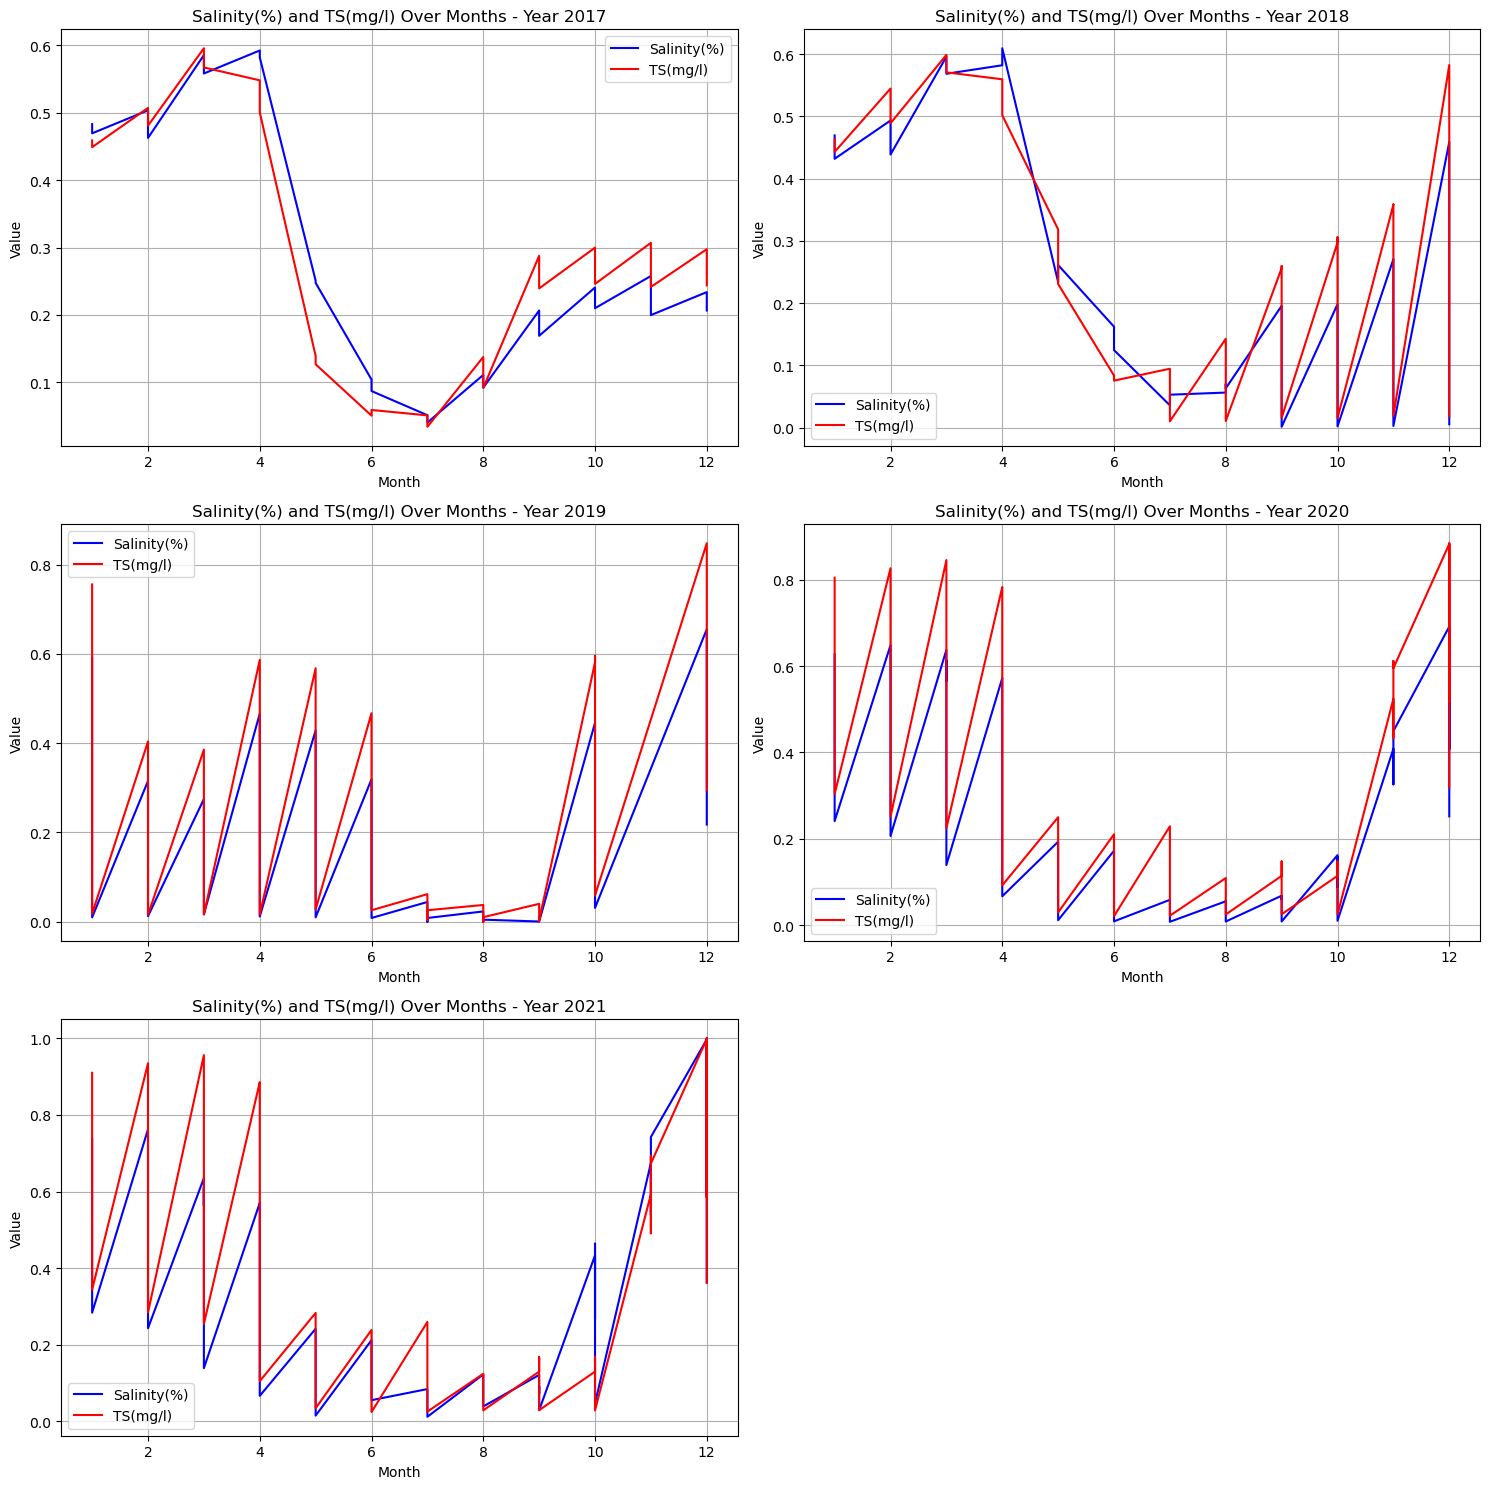

In [21]:
create_multiline_plots(df_scaled, num_rows=3, num_cols=2, x_col='month', y1_col='Salinity(%)', y2_col='TS(mg/l)')

## Preparing for the model

### In order to have a optimized and accurate prediction model, it is important to choose the correct features(inputs and output).Heatmap shows the correlation between the features. 

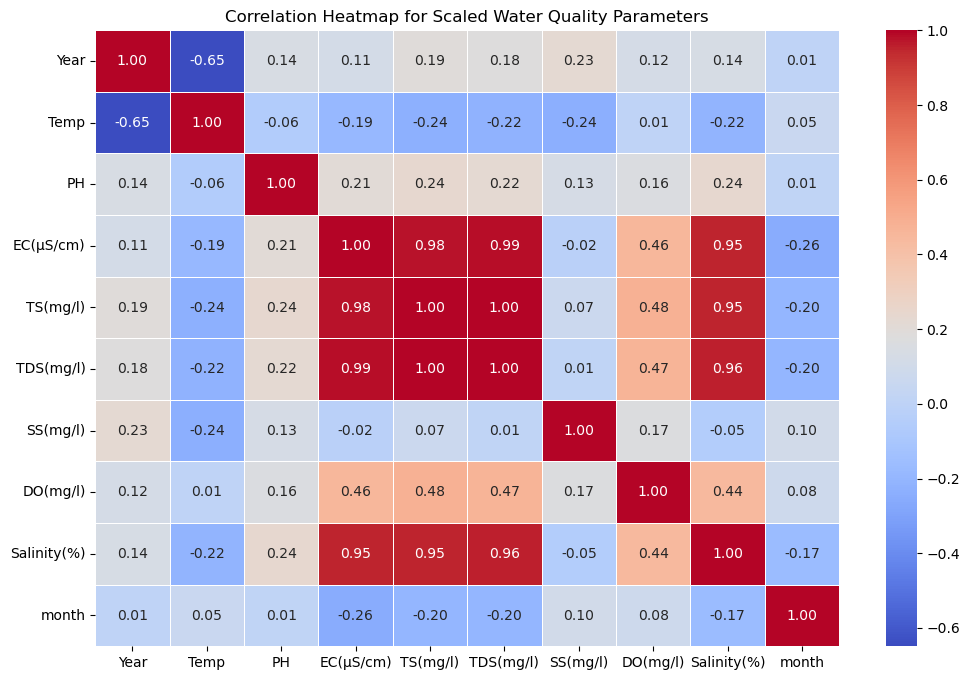

In [25]:
correlation_matrix = df.corr()

# Create the heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Scaled Water Quality Parameters')
plt.show()

#### Choose EC,TDS,TS and Salinity as they have high correlation.

In [31]:
columns_to_drop = ['Temp', 'SS(mg/l)', 'PH']
df2 = df.drop(columns=columns_to_drop)
df2.head()

,Year,Sample Location,EC(µS/cm),TS(mg/l),TDS(mg/l),DO(mg/l),Salinity(%),month
0,2017,CUFL,20450.0,10414.0,10228.0,5.6,14.2,1
1,2017,TSP,19984.0,10190.0,9992.0,6.1,13.8,1
2,2017,CUFL,22580.0,11494.0,11292.0,4.8,14.8,2
3,2017,TSP,21356.0,10906.0,10678.0,5.4,13.6,2
4,2017,TSP,26330.0,13476.0,13168.0,6.1,17.2,3


In [32]:
df2['Sample Location'].unique()

array(['CUFL', 'TSP', 'Chaktai Khal', 'KAFCO'], dtype=object)

In [33]:
# i will convert year into strings
df2['Year'] = df2['Year'].apply(lambda x: '2k' + str(x)[-2:])
df2.head()



,Year,Sample Location,EC(µS/cm),TS(mg/l),TDS(mg/l),DO(mg/l),Salinity(%),month
0,2k17,CUFL,20450.0,10414.0,10228.0,5.6,14.2,1
1,2k17,TSP,19984.0,10190.0,9992.0,6.1,13.8,1
2,2k17,CUFL,22580.0,11494.0,11292.0,4.8,14.8,2
3,2k17,TSP,21356.0,10906.0,10678.0,5.4,13.6,2
4,2k17,TSP,26330.0,13476.0,13168.0,6.1,17.2,3


In [34]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Use the map function to replace numeric months with month names
df2['month'] = df['month'].map(month_mapping)

df2.head()

,Year,Sample Location,EC(µS/cm),TS(mg/l),TDS(mg/l),DO(mg/l),Salinity(%),month
0,2k17,CUFL,20450.0,10414.0,10228.0,5.6,14.2,January
1,2k17,TSP,19984.0,10190.0,9992.0,6.1,13.8,January
2,2k17,CUFL,22580.0,11494.0,11292.0,4.8,14.8,February
3,2k17,TSP,21356.0,10906.0,10678.0,5.4,13.6,February
4,2k17,TSP,26330.0,13476.0,13168.0,6.1,17.2,March


In [35]:
location_dummies = pd.get_dummies(df2['Sample Location'])

month_dummies = pd.get_dummies(df2['month'])

year_dummies = pd.get_dummies(df2['Year'])

# Concatenate the two sets of dummy variables horizontally (axis=1)
dummies = pd.concat([location_dummies, month_dummies, year_dummies], axis=1)

# Print the first few rows of the resulting DataFrame
print(dummies.head(3))

   CUFL  Chaktai Khal  KAFCO  TSP  April  August  December  February  January  \
0     1             0      0    0      0       0         0         0        1   
1     0             0      0    1      0       0         0         0        1   
2     1             0      0    0      0       0         0         1        0   

   July  ...  March  May  November  October  September  2k17  2k18  2k19  \
0     0  ...      0    0         0        0          0     1     0     0   
1     0  ...      0    0         0        0          0     1     0     0   
2     0  ...      0    0         0        0          0     1     0     0   

   2k20  2k21  
0     0     0  
1     0     0  
2     0     0  

[3 rows x 21 columns]


In [36]:
df3 = pd.concat([df2,dummies],axis = 1)
df3.head()

,Year,Sample Location,EC(µS/cm),TS(mg/l),TDS(mg/l),DO(mg/l),Salinity(%),month,CUFL,Chaktai Khal,...,March,May,November,October,September,2k17,2k18,2k19,2k20,2k21
0,2k17,CUFL,20450.0,10414.0,10228.0,5.6,14.2,January,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2k17,TSP,19984.0,10190.0,9992.0,6.1,13.8,January,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2k17,CUFL,22580.0,11494.0,11292.0,4.8,14.8,February,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2k17,TSP,21356.0,10906.0,10678.0,5.4,13.6,February,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2k17,TSP,26330.0,13476.0,13168.0,6.1,17.2,March,0,0,...,1,0,0,0,0,1,0,0,0,0


In [37]:
columns_to_drop = ['Year','Sample Location','month']
df3 = df3.drop(columns=columns_to_drop)
df3.head()

,EC(µS/cm),TS(mg/l),TDS(mg/l),DO(mg/l),Salinity(%),CUFL,Chaktai Khal,KAFCO,TSP,April,...,March,May,November,October,September,2k17,2k18,2k19,2k20,2k21
0,20450.0,10414.0,10228.0,5.6,14.2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,19984.0,10190.0,9992.0,6.1,13.8,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,22580.0,11494.0,11292.0,4.8,14.8,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,21356.0,10906.0,10678.0,5.4,13.6,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,26330.0,13476.0,13168.0,6.1,17.2,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


### Input and Output Selection

In [39]:
X = df3.drop(['Salinity(%)'],axis='columns')   #input
X.head(3)

,EC(µS/cm),TS(mg/l),TDS(mg/l),DO(mg/l),CUFL,Chaktai Khal,KAFCO,TSP,April,August,...,March,May,November,October,September,2k17,2k18,2k19,2k20,2k21
0,20450.0,10414.0,10228.0,5.6,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,19984.0,10190.0,9992.0,6.1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,22580.0,11494.0,11292.0,4.8,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [40]:
X.shape

(171, 25)

In [41]:
y = df3['Salinity(%)']  #Output
y.head(3)

0    14.2
1    13.8
2    14.8
Name: Salinity(%), dtype: float64

In [42]:
len(y)

171

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [44]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9341341140517367

In [45]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.92431869, 0.97009513, 0.94365758, 0.92045446, 0.88806192,
       0.93600909, 0.93017999, 0.88348923, 0.8991092 , 0.91018215])

In [46]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [5, 10],  # You can customize these values
                'max_depth': [None, 10],  # You can customize these values
                'min_samples_split': [2, 5]  # You can customize these values
            }
        }
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Call the function with your X and y data
result_df = find_best_model_using_gridsearchcv(X, y)
result_df


,model,best_score,best_params
0,linear_regression,0.929080,{'fit_intercept': False}
1,decision_tree,0.916746,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,random_forest,0.953696,"{'max_depth': 10, 'min_samples_split': 5, 'n_e..."


In [47]:
def EcoSalinity(EC, TS, TDS, location):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = EC  # Assuming TDS is in mg/l
    x[1] = TS   # Assuming EC is in mg/l
    x[2] = TDS   # Assuming TS is in mg/l
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]


In [48]:
EcoSalinity(20450.0,10414.0,10228.0,'CUFL')

13.14069313969327

In [49]:
df3.head()

,EC(µS/cm),TS(mg/l),TDS(mg/l),DO(mg/l),Salinity(%),CUFL,Chaktai Khal,KAFCO,TSP,April,...,March,May,November,October,September,2k17,2k18,2k19,2k20,2k21
0,20450.0,10414.0,10228.0,5.6,14.2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,19984.0,10190.0,9992.0,6.1,13.8,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,22580.0,11494.0,11292.0,4.8,14.8,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,21356.0,10906.0,10678.0,5.4,13.6,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,26330.0,13476.0,13168.0,6.1,17.2,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [50]:
EcoSalinity(20450.0,10414.0,10228.0,'TSP')

13.110417406573763

### So the results are pretty GOOD

### Model 2 (Location Based)

In [64]:
columns_to_drop = [ 'EC(µS/cm)','TS(mg/l)','TDS(mg/l)','DO(mg/l)']
df4 = df3.drop(columns=columns_to_drop)
df4.head()

,Salinity(%),CUFL,Chaktai Khal,KAFCO,TSP,April,August,December,February,January,...,March,May,November,October,September,2k17,2k18,2k19,2k20,2k21
0,14.2,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,13.8,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,14.8,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,13.6,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,17.2,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [66]:
X2 = df4.drop(['Salinity(%)'],axis='columns')
X2.head(3)

,CUFL,Chaktai Khal,KAFCO,TSP,April,August,December,February,January,July,...,March,May,November,October,September,2k17,2k18,2k19,2k20,2k21
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [69]:
y2 = df4['Salinity(%)']
y2.head(3)

0    14.2
1    13.8
2    14.8
Name: Salinity(%), dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.25,random_state=10)

In [71]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6430008962465145

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.8373992004970996

In [75]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

cross_val_score(RandomForestRegressor(), X2, y2, cv=cv)

array([0.79059342, 0.80180671, 0.8090442 , 0.75066983, 0.70668242])

In [76]:
from sklearn.linear_model import BayesianRidge
bayesian_ridge_clf = BayesianRidge()
bayesian_ridge_clf.fit(X_train, y_train)
bayesian_ridge_clf.score(X_test, y_test)


0.6668627680696482

In [77]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

cross_val_score(BayesianRidge(), X2, y2, cv=cv)

array([0.65705002, 0.56624854, 0.66242847, 0.69177299, 0.55729615])

In [79]:
def EcoSalinity2(location, month, year):
    loc_index = np.where(X2.columns == location)[0][0]
    month_index = np.where(X2.columns == month)[0][0]
    year_index = np.where(X2.columns == year)[0][0]
    x = np.zeros(len(X2.columns))
    x[loc_index] = 1  # Set the corresponding location column to 1
    x[month_index] = 1  # Set the corresponding month column to 1
    x[year_index] = 1
    # Now you can use your trained model to make predictions using the x array
    
    prediction = rf_clf.predict([x])  # Assuming lr_clf is your trained Linear Regression model
    
    return prediction

In [80]:
EcoSalinity2('CUFL', 'January','2k17')


array([14.8362])

In [85]:
result = df4.loc[(df3['2k17'] == 1) & (df3['January'] == 1) & (df3['CUFL'] == 1), 'Salinity(%)']
print(result)



0    14.2
Name: Salinity(%), dtype: float64


### Using Random Forest we can get a very accurate prediction